# 2022 World Cup Stats in Python

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import datetime

In [2]:
import os
print(os.getcwd())

C:\Users\Ciaran Lynch


### Call my data Frame df_World_Cup based on csv file called - Squads

In [3]:
df_World_Cup = pd.read_csv('C:\\Users\\Ciaran Lynch\\Squads.csv', header=None) 


### Show my new dataFrame, make sure it has been loaded correctly

In [4]:
df_World_Cup 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ARG,argentina (ARG),1001,1,GK,Franco Armani,16/10/1986,36,18,0,River Plate,Liga Professional Argentina,Argentina
1,ARG,argentina (ARG),1002,2,DF,Juan Foyth,12/01/1998,24,16,0,Villarreal,La Liga,Spain
2,ARG,argentina (ARG),1003,3,DF,Nicolás Tagliafico,31/08/1992,30,42,0,Lyon,Ligue 1,France
3,ARG,argentina (ARG),1004,4,DF,Gonzalo Montiel,01/01/1997,25,18,0,Sevilla,La Liga,Spain
4,ARG,argentina (ARG),1005,5,MF,Leandro Paredes,29/06/1994,28,46,4,Juventus,Serie A,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,wales (WAL),1826,22,MF,Sorba Thomas,25/01/1999,23,6,0,Huddersfield Town,Championship,England
826,WAL,wales (WAL),1827,23,MF,Dylan Levitt,17/11/2000,22,13,0,Dundee United,Premiership,Scotland
827,WAL,wales (WAL),1828,24,DF,Ben Cabango,30/05/2000,22,5,0,Swansea City,Championship,England
828,WAL,wales (WAL),1829,25,MF,Rubin Colwill,27/04/2002,20,7,1,Cardiff City,Championship,England


### Data Cleaning Operations

In [5]:
Column_Header =  {
                    df_World_Cup.columns[0]:  'National_Team_ID',
                    df_World_Cup.columns[1]:  'National_Team',
                    df_World_Cup.columns[2]:  'Player_No',
                    df_World_Cup.columns[3]:  'Squad_No',
                    df_World_Cup.columns[4]:  'Position',
                    df_World_Cup.columns[5]:  'Player_Name',
                    df_World_Cup.columns[6]:  'Date_Of_Birth',
                    df_World_Cup.columns[7]:  'Age',
                    df_World_Cup.columns[8]:  'Caps',
                    df_World_Cup.columns[9]:  'Goals',
                    df_World_Cup.columns[10]:  'Current_Club',
                    df_World_Cup.columns[11]: 'Football_League',
                    df_World_Cup.columns[12]: 'FA'
                    
                  }


df_World_Cup.rename(columns = Column_Header, inplace = True) # adding a dictionary to place columns into the headers in Python

### check all the colums are imported correctly

In [6]:
df_World_Cup.columns 

Index(['National_Team_ID', 'National_Team', 'Player_No', 'Squad_No',
       'Position', 'Player_Name', 'Date_Of_Birth', 'Age', 'Caps', 'Goals',
       'Current_Club', 'Football_League', 'FA'],
      dtype='object')

In [7]:
df_World_Cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   National_Team_ID  830 non-null    object
 1   National_Team     830 non-null    object
 2   Player_No         830 non-null    int64 
 3   Squad_No          830 non-null    int64 
 4   Position          830 non-null    object
 5   Player_Name       830 non-null    object
 6   Date_Of_Birth     830 non-null    object
 7   Age               830 non-null    int64 
 8   Caps              830 non-null    int64 
 9   Goals             830 non-null    int64 
 10  Current_Club      830 non-null    object
 11  Football_League   830 non-null    object
 12  FA                830 non-null    object
dtypes: int64(5), object(8)
memory usage: 84.4+ KB


In [8]:
df_World_Cup.shape

(830, 13)

In [9]:
df_World_Cup['Date_Of_Birth'] = pd.to_datetime(df_World_Cup.Date_Of_Birth, dayfirst = True)

In [10]:
df_World_Cup.dtypes

National_Team_ID            object
National_Team               object
Player_No                    int64
Squad_No                     int64
Position                    object
Player_Name                 object
Date_Of_Birth       datetime64[ns]
Age                          int64
Caps                         int64
Goals                        int64
Current_Club                object
Football_League             object
FA                          object
dtype: object

### drop any rows that have less than 4 values

In [11]:
df_World_Cup.dropna(thresh=4, axis=0) 

,National_Team_ID,National_Team,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA
0,ARG,argentina (ARG),1001,1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina
1,ARG,argentina (ARG),1002,2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain
2,ARG,argentina (ARG),1003,3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France
3,ARG,argentina (ARG),1004,4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain
4,ARG,argentina (ARG),1005,5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,wales (WAL),1826,22,MF,Sorba Thomas,1999-01-25,23,6,0,Huddersfield Town,Championship,England
826,WAL,wales (WAL),1827,23,MF,Dylan Levitt,2000-11-17,22,13,0,Dundee United,Premiership,Scotland
827,WAL,wales (WAL),1828,24,DF,Ben Cabango,2000-05-30,22,5,0,Swansea City,Championship,England
828,WAL,wales (WAL),1829,25,MF,Rubin Colwill,2002-04-27,20,7,1,Cardiff City,Championship,England


### check rows are running in sequence, should be 830 rows with no blanks

In [12]:
df_World_Cup.index 

RangeIndex(start=0, stop=830, step=1)

## #quick look to see how the DataFrame is set

In [13]:
df_World_Cup.head(10) 

,National_Team_ID,National_Team,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA
0,ARG,argentina (ARG),1001,1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina
1,ARG,argentina (ARG),1002,2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain
2,ARG,argentina (ARG),1003,3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France
3,ARG,argentina (ARG),1004,4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain
4,ARG,argentina (ARG),1005,5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy
5,ARG,argentina (ARG),1006,6,DF,Germán Pezzella,1991-06-27,31,32,2,Real Betis,La Liga,Spain
6,ARG,argentina (ARG),1007,7,MF,Rodrigo De Paul,1994-05-24,28,44,2,Atlético Madrid,La Liga,Spain
7,ARG,argentina (ARG),1008,8,MF,Marcos Acuña,1991-10-28,31,43,0,Sevilla,La Liga,Spain
8,ARG,argentina (ARG),1009,9,FW,Julián Álvarez,2000-01-31,22,12,3,Manchester City,Premier League,England
9,ARG,argentina (ARG),1010,10,FW,Lionel Messi,1987-06-24,35,165,91,Paris Saint-Germain,Ligue 1,France


### Remove everything past the ')' after the National_Team

In [14]:
df_World_Cup['National_Team'] = df_World_Cup['National_Team'].str.split(')').str[0] + ")" 
df_World_Cup

,National_Team_ID,National_Team,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA
0,ARG,argentina (ARG),1001,1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina
1,ARG,argentina (ARG),1002,2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain
2,ARG,argentina (ARG),1003,3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France
3,ARG,argentina (ARG),1004,4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain
4,ARG,argentina (ARG),1005,5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,wales (WAL),1826,22,MF,Sorba Thomas,1999-01-25,23,6,0,Huddersfield Town,Championship,England
826,WAL,wales (WAL),1827,23,MF,Dylan Levitt,2000-11-17,22,13,0,Dundee United,Premiership,Scotland
827,WAL,wales (WAL),1828,24,DF,Ben Cabango,2000-05-30,22,5,0,Swansea City,Championship,England
828,WAL,wales (WAL),1829,25,MF,Rubin Colwill,2002-04-27,20,7,1,Cardiff City,Championship,England


### Separate the Country Name from the Country Code.

In [15]:
df_World_Cup[['National_Team','Code']] = df_World_Cup['National_Team'].str.split('(', 1, expand=True) 
df_World_Cup

,National_Team_ID,National_Team,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA,Code
0,ARG,argentina,1001,1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina,ARG)
1,ARG,argentina,1002,2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain,ARG)
2,ARG,argentina,1003,3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France,ARG)
3,ARG,argentina,1004,4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain,ARG)
4,ARG,argentina,1005,5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy,ARG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,wales,1826,22,MF,Sorba Thomas,1999-01-25,23,6,0,Huddersfield Town,Championship,England,WAL)
826,WAL,wales,1827,23,MF,Dylan Levitt,2000-11-17,22,13,0,Dundee United,Premiership,Scotland,WAL)
827,WAL,wales,1828,24,DF,Ben Cabango,2000-05-30,22,5,0,Swansea City,Championship,England,WAL)
828,WAL,wales,1829,25,MF,Rubin Colwill,2002-04-27,20,7,1,Cardiff City,Championship,England,WAL)


### Set the Column order

In [16]:
df_World_Cup = df_World_Cup.reindex(columns=['National_Team_ID','National_Team', 'Code','Player_No','Squad_No', 'Position', 'Player_Name', 'Date_Of_Birth', 'Age', 'Caps', 'Goals', 'Current_Club', 'Football_League', 'FA'])
df_World_Cup 

,National_Team_ID,National_Team,Code,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA
0,ARG,argentina,ARG),1001,1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina
1,ARG,argentina,ARG),1002,2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain
2,ARG,argentina,ARG),1003,3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France
3,ARG,argentina,ARG),1004,4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain
4,ARG,argentina,ARG),1005,5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,wales,WAL),1826,22,MF,Sorba Thomas,1999-01-25,23,6,0,Huddersfield Town,Championship,England
826,WAL,wales,WAL),1827,23,MF,Dylan Levitt,2000-11-17,22,13,0,Dundee United,Premiership,Scotland
827,WAL,wales,WAL),1828,24,DF,Ben Cabango,2000-05-30,22,5,0,Swansea City,Championship,England
828,WAL,wales,WAL),1829,25,MF,Rubin Colwill,2002-04-27,20,7,1,Cardiff City,Championship,England


### set column - Player_No as the primary key index

In [17]:
df_World_Cup.set_index("Player_No") 

,National_Team_ID,National_Team,Code,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA
Player_No,,,,,,,,,,,,,
1001,ARG,argentina,ARG),1,GK,Franco Armani,1986-10-16,36,18,0,River Plate,Liga Professional Argentina,Argentina
1002,ARG,argentina,ARG),2,DF,Juan Foyth,1998-01-12,24,16,0,Villarreal,La Liga,Spain
1003,ARG,argentina,ARG),3,DF,Nicolás Tagliafico,1992-08-31,30,42,0,Lyon,Ligue 1,France
1004,ARG,argentina,ARG),4,DF,Gonzalo Montiel,1997-01-01,25,18,0,Sevilla,La Liga,Spain
1005,ARG,argentina,ARG),5,MF,Leandro Paredes,1994-06-29,28,46,4,Juventus,Serie A,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,WAL,wales,WAL),22,MF,Sorba Thomas,1999-01-25,23,6,0,Huddersfield Town,Championship,England
1827,WAL,wales,WAL),23,MF,Dylan Levitt,2000-11-17,22,13,0,Dundee United,Premiership,Scotland
1828,WAL,wales,WAL),24,DF,Ben Cabango,2000-05-30,22,5,0,Swansea City,Championship,England


### Drop the Code column, not required as i already have National_Team_ID

In [18]:
df_World_Cup = df_World_Cup.drop('Code', axis = 1) 


### Create clean up function to clean National_Team Column and apply on next step

In [19]:
def cleanup(name): 
    name = name.strip()
    name = name.capitalize()
    return name

In [20]:
df_World_Cup['National_Team'] = df_World_Cup['National_Team'].apply(cleanup)

## Run data now on Player Experience

### Find mean and Standard Deviation of Player Caps to run function below

In [21]:
df_World_Cup['Caps'].dropna().describe() 

count    830.000000
mean      34.366265
std       33.971368
min        0.000000
25%        8.000000
50%       24.000000
75%       47.750000
max      191.000000
Name: Caps, dtype: float64

In [22]:
def Experience(Caps): # create a function and if statement to find experience of Players
    if Caps < 20:
        return 'Newcomer'
    elif Caps >= 20 and Caps < 40:
        return 'Novice'
    elif Caps >= 40 and Caps < 80:
        return 'Regular'
    elif Caps >= 80 and Caps < 101:
        return 'Master'
    else:
        return 'Legend'

Apply the Experience column to the DataFrame, based on above Function and If Statement

In [23]:
df_World_Cup['Experience'] = df_World_Cup['Caps'].apply(Experience) 

Create a mini DataFrame to review Player Data

In [24]:
Player_Review = df_World_Cup[ ['Player_Name','Caps', 'National_Team','Experience','Age'] ] 

In [25]:
Player_Review

,Player_Name,Caps,National_Team,Experience,Age
0,Franco Armani,18,Argentina,Newcomer,36
1,Juan Foyth,16,Argentina,Newcomer,24
2,Nicolás Tagliafico,42,Argentina,Regular,30
3,Gonzalo Montiel,18,Argentina,Newcomer,25
4,Leandro Paredes,46,Argentina,Regular,28
...,...,...,...,...,...
825,Sorba Thomas,6,Wales,Newcomer,23
826,Dylan Levitt,13,Wales,Newcomer,22
827,Ben Cabango,5,Wales,Newcomer,22
828,Rubin Colwill,7,Wales,Newcomer,20


In [26]:
ExperienceData = df_World_Cup.groupby('Experience')['Experience'].count()
ExperienceData

Experience
Legend       53
Master       32
Newcomer    363
Novice      198
Regular     184
Name: Experience, dtype: int64

Show Cap experience, by category, on Graph

<AxesSubplot:xlabel='Experience'>

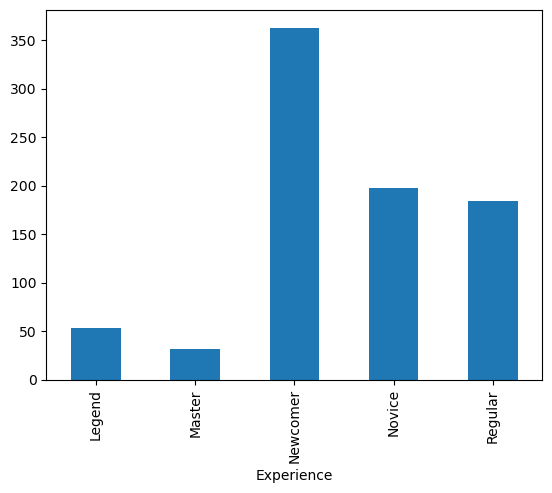

In [27]:
ExperienceData.plot(x="Experience", y=["Caps"], kind="bar") 

Show Top 20 Players By Caps

In [28]:
df_World_Cup.sort_values('Caps', ascending = False).head(20) 

,National_Team_ID,National_Team,Player_No,Squad_No,Position,Player_Name,Date_Of_Birth,Age,Caps,Goals,Current_Club,Football_League,FA,Experience
603,POR,Portugal,1552,7,FW,Cristiano Ronaldo,1985-02-05,37,191,117,Manchester United,Premier League,England,Legend
536,MEX,Mexico,1459,18,MF,Andrés Guardado,1986-09-28,36,178,28,Real Betis,La Liga,Spain,Legend
632,QAT,Qatar,1581,10,MF,Hassan Al-Haydos,1990-12-11,31,169,36,Al-Sadd,Stars League,Qatar,Legend
9,ARG,Argentina,1010,10,FW,Lionel Messi,1987-06-24,35,165,91,Paris Saint-Germain,Ligue 1,France,Legend
754,URU,Uruguay,1755,3,DF,Diego Godín,1986-02-16,36,159,8,Vélez Sarsfield,Liga Professional Argentina,Argentina,Legend
191,CRO,Croatia,1192,10,MF,Luka Modrić,1985-09-09,37,155,23,Real Madrid,La Liga,Spain,Legend
160,CRC,Costa rica,1161,5,MF,Celso Borges,1988-05-27,34,155,27,Alajuelense,Primera Division,Costa Rica,Legend
165,CRC,Costa rica,1166,10,MF,Bryan Ruiz,1985-08-18,37,146,29,Alajuelense,Primera Division,Costa Rica,Legend
56,BEL,Belgium,1057,5,DF,Jan Vertonghen,1987-04-24,35,142,9,Anderlecht,First Division A,Belgium,Legend
312,FRA,France,1287,1,GK,Hugo Lloris,1986-12-26,35,139,0,Tottenham Hotspur,Premier League,England,Legend


### Whats the maximum caps by player, prior to World Cup

In [29]:
df_World_Cup['Caps'].max() 

191

### Find data on most capped player

In [30]:
df_World_Cup.iloc[ df_World_Cup['Caps'].idxmax() ] 

National_Team_ID                    POR
National_Team                  Portugal
Player_No                          1552
Squad_No                              7
Position                             FW
Player_Name          Cristiano Ronaldo 
Date_Of_Birth       1985-02-05 00:00:00
Age                                  37
Caps                                191
Goals                               117
Current_Club          Manchester United
Football_League          Premier League
FA                              England
Experience                       Legend
Name: 603, dtype: object

## Run data now on Player Age info

### Find mean and Standard Deviation of Player Age

In [31]:
df_World_Cup['Age'].dropna().describe() 

count    830.000000
mean      26.951807
std        4.270988
min       18.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64

Create a function and if statement to find Age Range of Players

In [32]:
def AgeRange(Age): 
    if Age < 18:
        return 'Under 18'
    elif Age >= 18 and Age <= 21:
        return '18-21'
    elif Age > 21 and Age <= 25:
        return '22-25'
    elif Age > 25 and Age <= 29:
        return '26-29'
    elif Age > 29 and Age <= 33:
        return '30-33'
    elif Age > 33 and Age <= 37:
        return '34-37'
    elif Age > 38 and Age <= 41:
        return '38-41'
    else:
        return 'Over 41'

### Apply the AgeRange column to the DataFrame, based on above Function and If Statement

In [33]:
df_World_Cup['Age Range'] = df_World_Cup['Age'].apply(AgeRange)

### Create a mini DataFrame to review Players by Age

In [34]:
Player_Age_Range = df_World_Cup[ ['Player_No','Player_Name', 'Date_Of_Birth','Age','Caps','Age Range','FA','Current_Club'] ] 
Player_Age_Range

,Player_No,Player_Name,Date_Of_Birth,Age,Caps,Age Range,FA,Current_Club
0,1001,Franco Armani,1986-10-16,36,18,34-37,Argentina,River Plate
1,1002,Juan Foyth,1998-01-12,24,16,22-25,Spain,Villarreal
2,1003,Nicolás Tagliafico,1992-08-31,30,42,30-33,France,Lyon
3,1004,Gonzalo Montiel,1997-01-01,25,18,22-25,Spain,Sevilla
4,1005,Leandro Paredes,1994-06-29,28,46,26-29,Italy,Juventus
...,...,...,...,...,...,...,...,...
825,1826,Sorba Thomas,1999-01-25,23,6,22-25,England,Huddersfield Town
826,1827,Dylan Levitt,2000-11-17,22,13,22-25,Scotland,Dundee United
827,1828,Ben Cabango,2000-05-30,22,5,22-25,England,Swansea City
828,1829,Rubin Colwill,2002-04-27,20,7,18-21,England,Cardiff City


### Group the data by Age Range and count per category

In [35]:
AgeData = Player_Age_Range.groupby('Age Range')['Age Range'].count() 
AgeData

Age Range
18-21       80
22-25      262
26-29      248
30-33      182
34-37       50
38-41        6
Over 41      2
Name: Age Range, dtype: int64

### show Age Range, by category, on Graph

<AxesSubplot:xlabel='Age Range'>

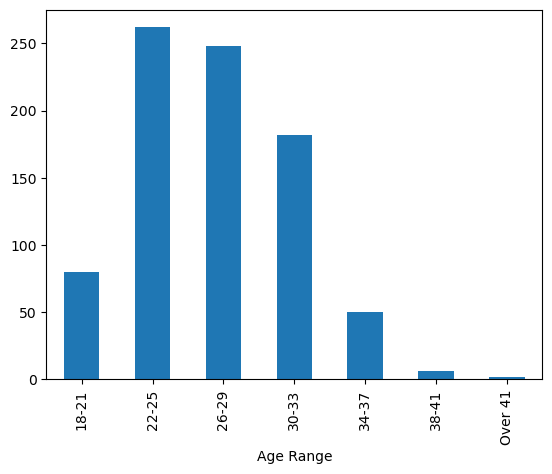

In [36]:
AgeData.plot(x="Age Range", y=["Age"], kind="bar") 

### What's the maximum Player Age 

In [37]:
Player_Age_Range['Age'].max() 

40

### Find data on oldest player

In [38]:
Player_Age_Range.iloc[ Player_Age_Range['Age'].idxmax() ] 

Player_No                       1442
Player_Name         Alfredo Talavera
Date_Of_Birth    1982-09-18 00:00:00
Age                               40
Caps                              40
Age Range                      38-41
FA                            Mexico
Current_Club                  Juárez
Name: 519, dtype: object

### Breakdown Year of Birth, count,sort and plot on a graph

In [39]:
Year = Player_Age_Range.Date_Of_Birth.dt.year.value_counts().sort_index()

<AxesSubplot:>

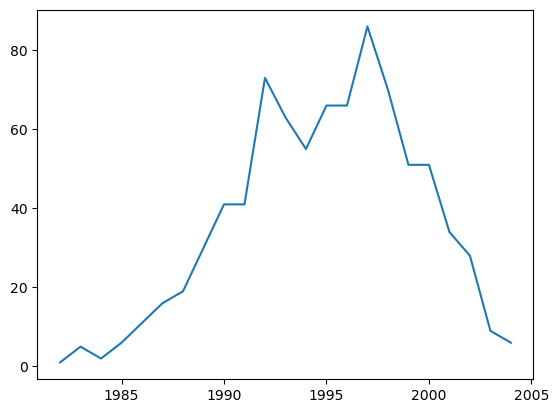

In [40]:
Year.plot()

## Create Goal Data on Players with more than 19 caps to find the Top Goal Scorers among the more experience Players, for more balanced data

### Create a column to find Ratio of goals scored by player to Games played (Caps)

In [41]:
df_World_Cup['Goals_Per_Game'] = df_World_Cup['Goals'] / df_World_Cup['Caps'] 

Create a mini DataFrame to review Players by Age

In [42]:
Goal_Data = df_World_Cup[ ['Player_Name','National_Team','Position','Age','Caps','Goals','Goals_Per_Game','Current_Club'] ] 


### Find the player with the best Goal to Cap ratio, with 20 or more caps to date

In [43]:
Top_Scorer = Goal_Data['Caps'] > 19 

### Find the Top 10 more experience players by Goals Scored Ratio

In [44]:
Goal_Data[Top_Scorer].sort_values('Goals_Per_Game', ascending = False).head(10) 

,Player_Name,National_Team,Position,Age,Caps,Goals,Goals_Per_Game,Current_Club
268,Harry Kane,England,FW,29,75,51,0.680000,Tottenham Hotspur
60,Romelu Lukaku,Belgium,FW,29,102,68,0.666667,Internazionale
682,Aleksandar Mitrović,Serbia,FW,28,76,50,0.657895,Fulham
409,Sardar Azmoun,Iran,FW,27,65,41,0.630769,Bayer Leverkusen
123,Jonathan David,Canada,FW,22,35,22,0.628571,Lille
87,Neymar,Brasil,FW,30,121,75,0.619835,Paris Saint-Germain
603,Cristiano Ronaldo,Portugal,FW,37,191,117,0.612565,Manchester United
579,Robert Lewandowski,Poland,FW,34,134,76,0.567164,Barcelona
347,Serge Gnabry,Germany,FW,27,36,20,0.555556,Bayern Munich
9,Lionel Messi,Argentina,FW,35,165,91,0.551515,Paris Saint-Germain


## Review Data by Leagues - please note that Football League, FA and FIFA Region are in respect of the Football Club, Not the Players National Team

### Create a mini DataFrame to review Club Data

In [45]:
League_Review = df_World_Cup[ ['Player_No','Player_Name','Current_Club','Football_League','FA'] ] 

In [46]:
League_Review

,Player_No,Player_Name,Current_Club,Football_League,FA
0,1001,Franco Armani,River Plate,Liga Professional Argentina,Argentina
1,1002,Juan Foyth,Villarreal,La Liga,Spain
2,1003,Nicolás Tagliafico,Lyon,Ligue 1,France
3,1004,Gonzalo Montiel,Sevilla,La Liga,Spain
4,1005,Leandro Paredes,Juventus,Serie A,Italy
...,...,...,...,...,...
825,1826,Sorba Thomas,Huddersfield Town,Championship,England
826,1827,Dylan Levitt,Dundee United,Premiership,Scotland
827,1828,Ben Cabango,Swansea City,Championship,England
828,1829,Rubin Colwill,Cardiff City,Championship,England


### Set column as primary key index

In [47]:
League_Review.set_index("Player_No") 

,Player_Name,Current_Club,Football_League,FA
Player_No,,,,
1001,Franco Armani,River Plate,Liga Professional Argentina,Argentina
1002,Juan Foyth,Villarreal,La Liga,Spain
1003,Nicolás Tagliafico,Lyon,Ligue 1,France
1004,Gonzalo Montiel,Sevilla,La Liga,Spain
1005,Leandro Paredes,Juventus,Serie A,Italy
...,...,...,...,...
1826,Sorba Thomas,Huddersfield Town,Championship,England
1827,Dylan Levitt,Dundee United,Premiership,Scotland
1828,Ben Cabango,Swansea City,Championship,England


### Find the Top 20 Football Clubs with the most assigned Players to the World Cup - also list their League and FA

In [48]:
Top_Clubs = League_Review.groupby(['Current_Club','Football_League','FA'])['Current_Club'].count()
Top_Clubs.sort_values(axis=0, ascending = False).head(20)

Current_Club             Football_League   FA          
 Barcelona               La Liga           Spain           17
 Manchester City         Premier League    England         16
 Bayern Munich           Bundesliga        Germany         16
 Al-Sadd                 Stars League      Qatar           15
 Manchester United       Premier League    England         14
 Real Madrid             La Liga           Spain           13
 Al-Hilal                Saudi Division 1  Saudi Arabia    12
 Chelsea                 Premier League    England         12
 Atlético Madrid         La Liga           Spain           12
 Borussia Dortmund       Bundesliga        Germany         11
 Paris Saint-Germain     Ligue 1           France          11
 Ajax                    Eredivisie        Netherlands     11
 Tottenham Hotspur       Premier League    England         11
 Juventus                Serie A           Italy           11
 Arsenal                 Premier League    England         10
 Sevilla      

In [49]:
Top_Clubs.mean()

2.804054054054054

In [50]:
Top_Clubs.median()

2.0

In [51]:
Top_Clubs.std()

2.9219422001122943

### Find the Top 10 Football Leagues with the most assigned Players to the World Cup - also list their FA

In [52]:
Top_Leagues = League_Review.groupby(['Football_League','FA'])['Football_League'].count() 
Top_Leagues.sort_values(axis=0, ascending = False).head(10)

Football_League   FA          
Premier League    England         134
La Liga           Spain            84
Bundesliga        Germany          77
Serie A           Italy            65
Ligue 1           France           55
MLS               USA              36
Saudi Division 1  Saudi Arabia     35
Stars League      Qatar            33
Championship      England          26
Liga MX           Mexico           24
Name: Football_League, dtype: int64

In [53]:
Top_Leagues.mean()

15.660377358490566

In [54]:
Top_Leagues.median()

6.0

In [55]:
Top_Leagues.std()

25.238053835296487

## Call in outcome table to merge data

### Call in a new Data Frame based on World Cup Outcome by Nation

In [56]:
df_Outcome = pd.read_csv('C:\\Users\\Ciaran Lynch\\Outcome.csv', header=None)

In [57]:
Column_Outcome =  {
                    df_Outcome.columns[0]:  'National_Team_ID',
                    df_Outcome.columns[1]:  'National_Team',
                    df_Outcome.columns[2]:  'Final_Outcome'
                                      
                  }


df_Outcome.rename(columns = Column_Outcome, inplace = True) # adding a dictionary to place columns into the headers of Outcome csv

### Set column - National_Team_ID as the primary key index

In [58]:
df_Outcome.set_index('National_Team_ID') 
df_Outcome

,National_Team_ID,National_Team,Final_Outcome
0,ARG,Argentina,Winner
1,AUS,Australia,Last 16
2,BEL,Belgium,Group Stages
3,BRA,Brasil,Quarter Finals
4,CAN,Canada,Group Stages
5,CMR,Cameroon,Group Stages
6,CRC,Costa Rica,Group Stages
7,CRO,Croatia,Third
8,DEN,Denmark,Group Stages
9,ECU,Ecuador,Group Stages


In [59]:
df_Outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   National_Team_ID  32 non-null     object
 1   National_Team     32 non-null     object
 2   Final_Outcome     32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [60]:
result = pd.merge(df_Outcome,df_World_Cup, left_on='National_Team_ID', right_on = 'National_Team_ID')

In [61]:
result.columns

Index(['National_Team_ID', 'National_Team_x', 'Final_Outcome',
       'National_Team_y', 'Player_No', 'Squad_No', 'Position', 'Player_Name',
       'Date_Of_Birth', 'Age', 'Caps', 'Goals', 'Current_Club',
       'Football_League', 'FA', 'Experience', 'Age Range', 'Goals_Per_Game'],
      dtype='object')

In [62]:
result.shape

(830, 18)

In [63]:
result = result.drop('National_Team_y',axis = 1) 

In [64]:
result = result.drop('Date_Of_Birth',axis = 1) 

In [65]:
result = result.drop('FA',axis = 1) 

In [66]:
result = result.drop('Goals_Per_Game',axis = 1) 

In [67]:
result.rename(columns={'National_Team_x': 'National_Team','Final_Outcome_x' : 'Final_Outcome' }, inplace=True)

In [68]:
result

,National_Team_ID,National_Team,Final_Outcome,Player_No,Squad_No,Position,Player_Name,Age,Caps,Goals,Current_Club,Football_League,Experience,Age Range
0,ARG,Argentina,Winner,1001,1,GK,Franco Armani,36,18,0,River Plate,Liga Professional Argentina,Newcomer,34-37
1,ARG,Argentina,Winner,1002,2,DF,Juan Foyth,24,16,0,Villarreal,La Liga,Newcomer,22-25
2,ARG,Argentina,Winner,1003,3,DF,Nicolás Tagliafico,30,42,0,Lyon,Ligue 1,Regular,30-33
3,ARG,Argentina,Winner,1004,4,DF,Gonzalo Montiel,25,18,0,Sevilla,La Liga,Newcomer,22-25
4,ARG,Argentina,Winner,1005,5,MF,Leandro Paredes,28,46,4,Juventus,Serie A,Regular,26-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,WAL,Wales,Group Stages,1826,22,MF,Sorba Thomas,23,6,0,Huddersfield Town,Championship,Newcomer,22-25
826,WAL,Wales,Group Stages,1827,23,MF,Dylan Levitt,22,13,0,Dundee United,Premiership,Newcomer,22-25
827,WAL,Wales,Group Stages,1828,24,DF,Ben Cabango,22,5,0,Swansea City,Championship,Newcomer,22-25
828,WAL,Wales,Group Stages,1829,25,MF,Rubin Colwill,20,7,1,Cardiff City,Championship,Newcomer,18-21


## Get the list of players from the Teams that qualified for the Semi Final or better (last 4 left in the Tournament - Should be 104 players)

### Then compare the age and cap data with the original 830 Players

In [69]:
df_Last_Four = result[ (result.Final_Outcome == 'Winner') | (result.Final_Outcome == 'Runner Up') | (result.Final_Outcome == 'Third') | (result.Final_Outcome == 'Fourth')]

In [70]:
df_Last_Four

,National_Team_ID,National_Team,Final_Outcome,Player_No,Squad_No,Position,Player_Name,Age,Caps,Goals,Current_Club,Football_League,Experience,Age Range
0,ARG,Argentina,Winner,1001,1,GK,Franco Armani,36,18,0,River Plate,Liga Professional Argentina,Newcomer,34-37
1,ARG,Argentina,Winner,1002,2,DF,Juan Foyth,24,16,0,Villarreal,La Liga,Newcomer,22-25
2,ARG,Argentina,Winner,1003,3,DF,Nicolás Tagliafico,30,42,0,Lyon,Ligue 1,Regular,30-33
3,ARG,Argentina,Winner,1004,4,DF,Gonzalo Montiel,25,18,0,Sevilla,La Liga,Newcomer,22-25
4,ARG,Argentina,Winner,1005,5,MF,Leandro Paredes,28,46,4,Juventus,Serie A,Regular,26-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,MAR,Morocco,Fourth,1489,22,GK,Ahmed Reda Tagnaouti,26,3,0,Wydad AC,Botola Pro,Newcomer,26-29
515,MAR,Morocco,Fourth,1490,23,MF,Bilal El Khannous,18,0,0,Genk,First Division A,Newcomer,18-21
516,MAR,Morocco,Fourth,1491,24,DF,Badr Benoun,29,3,0,Qatar SC,Stars League,Newcomer,26-29
517,MAR,Morocco,Fourth,1492,25,DF,Yahia Attiyat Allah,27,2,0,Wydad AC,Botola Pro,Newcomer,26-29


In [71]:
df_World_Cup['Caps'].mean()

34.36626506024096

In [72]:
df_World_Cup['Caps'].median()

24.0

In [73]:
df_World_Cup['Age'].mean()

26.951807228915662

In [74]:
df_Last_Four['Caps'].mean()

31.528846153846153

In [75]:
df_Last_Four['Caps'].median()

18.0

In [77]:
df_Last_Four['Age'].mean()

26.971153846153847

# Conclusion

This analysis provides insights into:

- Player experience distribution  
- Age structure of the tournament  
- Top goal scorers by efficiency  
- Clubs and leagues most affected  
- Differences between all players and the last four teams  

The project demonstrates a full data pipeline: sourcing, cleaning, transforming, analysing, and visualising real‑world football data.
